In [22]:
%load_ext autoreload
%autoreload 2
#%env CUDA_VISIBLE_DEVICES=3

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [23]:
colab_requirements = [
    "pip install librosa",
    "pip install noisereduce",
    "pip install soundfile",

]

import sys, subprocess

def run_subprocess_command(cmd):
    # run the command
    process = subprocess.Popen(cmd.split(), stdout=subprocess.PIPE)
    # print the output
    for line in process.stdout:
        print(line.decode().strip())

IN_COLAB = "google.colab" in sys.modules
if IN_COLAB:
    for i in colab_requirements:
        run_subprocess_command(i)

In [24]:

import IPython
from scipy.io import wavfile
import noisereduce as nr
import soundfile as sf
from noisereduce.generate_noise import band_limited_noise
import matplotlib.pyplot as plt
import urllib.request
import numpy as np
import io
%matplotlib inline


In [25]:
from scipy.io import wavfile
rate, data = wavfile.read('/content/drive/MyDrive/Kanhaiya_Final_Project/kanhaiya.wav')

data = data
rate=rate

In [26]:
!pip install pydub

In [27]:
from pydub import AudioSegment
sound = AudioSegment.from_wav("/content/drive/MyDrive/Kanhaiya_Final_Project/kanhaiya.wav")
sound = sound.set_channels(1)
sound.export("/content/drive/MyDrive/Kanhaiya_Final_Project/path.wav", format="wav")

<_io.BufferedRandom name='/content/drive/MyDrive/Kanhaiya_Final_Project/path.wav'>

In [28]:
wav_loc = "/content/drive/MyDrive/Kanhaiya_Final_Project/path.wav"
rate, data = wavfile.read(wav_loc)


In [29]:
IPython.display.Audio(data=data, rate=rate)

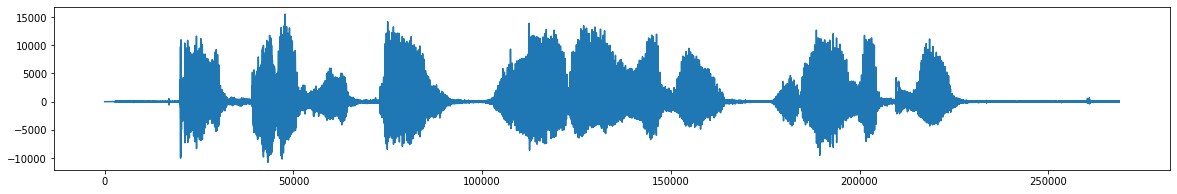

In [30]:
fig, ax = plt.subplots(figsize=(20,3))
ax.plot(data)

In [43]:
noise_len = 2 # seconds
noise = band_limited_noise(min_freq=2000, max_freq = 18000, samples=len(data), samplerate=rate)*10
noise_clip = noise[:rate*noise_len]
audio_clip_band_limited = data+noise

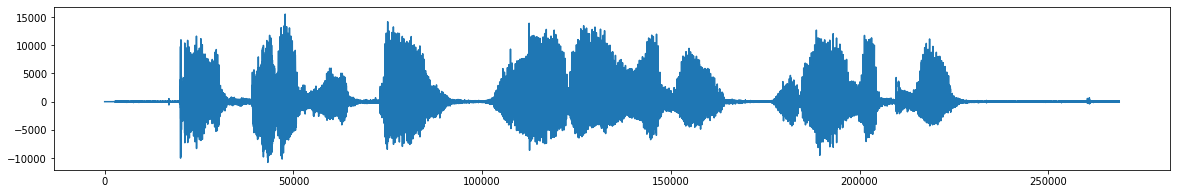

In [44]:
fig, ax = plt.subplots(figsize=(20,3))
ax.plot(audio_clip_band_limited)

In [45]:
IPython.display.Audio(data=audio_clip_band_limited, rate=rate)

In [46]:
reduced_noise = nr.reduce_noise(y = audio_clip_band_limited, sr=rate, n_std_thresh_stationary=1.5,stationary=True)

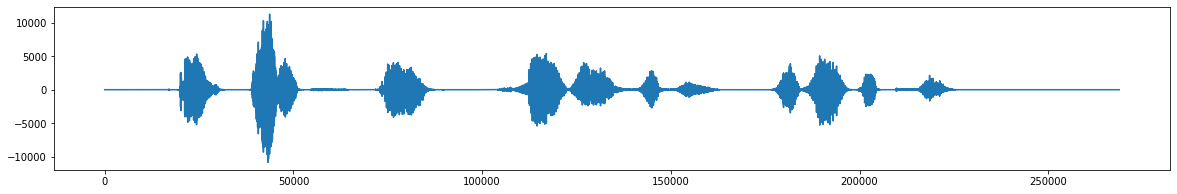

In [47]:
fig, ax = plt.subplots(figsize=(20,3))
ax.plot(reduced_noise)

In [48]:
IPython.display.Audio(data=reduced_noise, rate=rate)

In [49]:
reduced_noise = nr.reduce_noise(y = audio_clip_band_limited, sr=rate, thresh_n_mult_nonstationary=2,stationary=False)

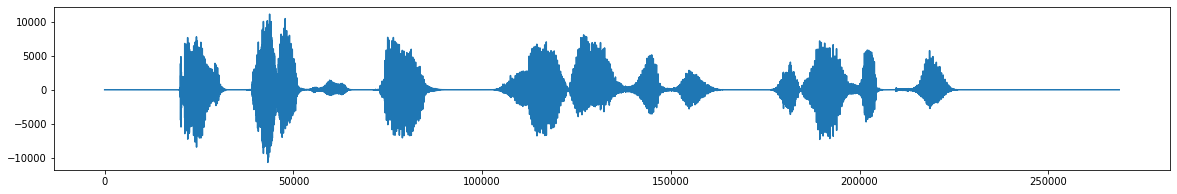

In [50]:
fig, ax = plt.subplots(figsize=(20,3))
ax.plot(reduced_noise)

In [51]:
IPython.display.Audio(data=reduced_noise, rate=rate)